<a href="https://colab.research.google.com/github/yujiayang1999/pima-analysis/blob/main/revise_2D__pima_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('diabetes.csv', delimiter=',')
# data = data.loc[~((data['Glucose'] == 0) | (data['BloodPressure'] == 0)|(data['SkinThickness'] == 0) | (data['BMI'] == 0))]
# data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]] = data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]].replace(0,np.nan)
features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]] = data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]].replace(0,data.mean(axis=0))
outcome = data.iloc[:,8]
# data.replace(0,data.mean(axis=0),inplace=True)
print(data)
print(data.describe().T)
# data.hist(column="Pregnancies")


     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0       6.000000    148.0           72.0      35.000000   79.799479  33.6   
1       1.000000     85.0           66.0      29.000000   79.799479  26.6   
2       8.000000    183.0           64.0      20.536458   79.799479  23.3   
3       1.000000     89.0           66.0      23.000000   94.000000  28.1   
4       3.845052    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763    10.000000    101.0           76.0      48.000000  180.000000  32.9   
764     2.000000    122.0           70.0      27.000000   79.799479  36.8   
765     5.000000    121.0           72.0      23.000000  112.000000  26.2   
766     1.000000    126.0           60.0      20.536458   79.799479  30.1   
767     1.000000     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

In [3]:
# from soft_impute import SoftImpute
# clf = SoftImpute(J=1, lambda_=2.0)
# X_test = data.to_numpy().copy()
# fit = clf.fit(X_test)
# imputed = clf.predict(X_test)
# k = imputed[:,0]
# plt.hist(k,bins = [0,2,4,6,8,10,12,14,16]) 
# plt.title("histogram") 
# plt.show()

In [4]:
d = preprocessing.normalize(data.iloc[:,0:8], axis=0)
# scaled_df = pd.DataFrame(d, columns = [data.columns])
scaled_df = pd.DataFrame(d, columns = features)
scaled_df = pd.concat([scaled_df, outcome], axis=1)
print(scaled_df.describe().T)
# d = preprocessing.normalize(data, axis=0)
# scaled_df = pd.DataFrame(d, columns = [data.columns])


# norm_data = preprocessing.normalize(Insurance_Data, axis=0)
# norm_df = pd.DataFrame(norm_data,columns=[Insurance_Data.columns])

                          count      mean       std       min       25%  \
Pregnancies               768.0  0.029872  0.020256  0.006788  0.013576   
Glucose                   768.0  0.035007  0.008756  0.012659  0.028698   
BloodPressure             768.0  0.035588  0.005968  0.011821  0.031522   
SkinThickness             768.0  0.033932  0.012283  0.008927  0.026191   
Insulin                   768.0  0.028399  0.022277  0.003351  0.019098   
BMI                       768.0  0.035302  0.007479  0.019799  0.029916   
DiabetesPedigreeFunction  768.0  0.029538  0.020740  0.004883  0.015258   
Age                       768.0  0.034021  0.012036  0.021493  0.024563   
Outcome                   768.0  0.348958  0.476951  0.000000  0.000000   

                               50%       75%       max  
Pregnancies               0.026099  0.040727  0.115393  
Glucose                   0.033660  0.040349  0.057251  
BloodPressure             0.035463  0.039403  0.060090  
SkinThickness        

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9bcda36d0>]],
      dtype=object)

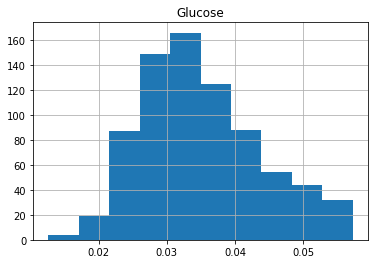

In [5]:
scaled_df.hist(column="Glucose")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9bcd09cd0>]],
      dtype=object)

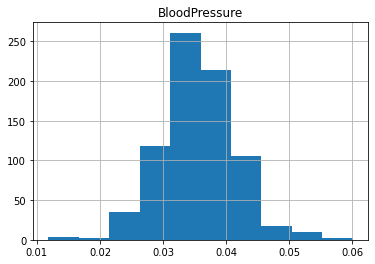

In [6]:
scaled_df.hist(column="BloodPressure")

In [7]:
X = scaled_df.iloc[:,0:8].to_numpy()
# dataset.iloc[:, 4]
print(X)
y = data.iloc[:,8].to_numpy()
print(y)


[[0.04072683 0.04257898 0.03546267 ... 0.03655192 0.03924821 0.05117289]
 [0.00678781 0.02445414 0.03250745 ... 0.02893694 0.02197149 0.03172719]
 [0.05430244 0.05264833 0.03152238 ... 0.02534702 0.04206507 0.03275065]
 ...
 [0.03393903 0.03481119 0.03546267 ... 0.0285018  0.01533622 0.03070373]
 [0.00678781 0.03624967 0.02955223 ... 0.03274443 0.02184629 0.04810252]
 [0.00678781 0.02675571 0.0344776  ... 0.03307079 0.019718   0.02353953]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 

In [8]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=5)

In [9]:
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=150, batch_size=10, verbose=0)
# evaluate the keras model
# test DS
#training error
_, accuracy = model.evaluate(x_train, y_train, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

predictions = (model.predict(x_test) > 0.5).astype(int)

# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (x_test[i].tolist(), predictions[i], y_test[i]))

Accuracy: 75.61
8/8 [==============================] - 0s 2ms/step
[0.04072683370647543, 0.026468013734211867, 0.030537300807401756, 0.04081093651464417, 0.030155216874819788, 0.034811354622936566, 0.005320730020922629, 0.047079059916829195] => 0 (expected 0)
[0.03393902808872953, 0.037975845792564855, 0.039402968783744205, 0.02619100303991568, 0.019098179371178546, 0.029154509496709377, 0.011643009222254223, 0.07061858987524379] => 0 (expected 0)
[0.020363416853237715, 0.030495754954635412, 0.03546267190536978, 0.02619100303991568, 0.019098179371178546, 0.028066654664742608, 0.012957542521540988, 0.02763336125553018] => 0 (expected 0)
[0.027151222470983623, 0.02848188434442364, 0.033492523466182575, 0.048462987111139944, 0.019098179371178546, 0.03568163848850998, 0.009076539447456249, 0.03377410820120355] => 0 (expected 0)
[0.027151222470983623, 0.027618796940047166, 0.02758207814862094, 0.021680810023404714, 0.011727028784652139, 0.02262738050490877, 0.021282920083690517, 0.026609903

In [11]:
testX = np.copy(x_test)
max = np.max(testX,axis=0)
print(max)

min = np.min(testX,axis=0)
print(min)

[0.1153927  0.05696377 0.05319401 0.08034653 0.17805938 0.06461858
 0.15148431 0.07061859]
[0.00678781 0.01639866 0.02364178 0.01020273 0.00335058 0.0209956
 0.00532073 0.02149261]


In [12]:
# #pregnancies
# X_preg_max = np.copy(testX)
# for i in range(len(X)):
#     X_preg_max[i][0] = max[0]
# _, accuracy = model.evaluate(X_preg_max, y, verbose=0)
# print('Accuracy: %.2f' % (accuracy*100))
# predictions_preg_max = model.predict(X_preg_max) 

# # reshape = predictions_preg_max.reshape(1,-1)
# # print(reshape)
# for i in range(5):
# 	print('%s => %s (expected %d)' % (X_preg_max[i].tolist(), predictions_preg_max[i], y[i]))


In [13]:
print(len(x_test))

231


#Max Max - Min Min

In [14]:
MaxMax = [[0 for x in range(28)] for y in range(len(x_test))]

In [15]:
prediction_max = []
for i in range(len(x_test)):
  row_index = 0
  X_single= np.full((28,8),x_test[i])
  for m in range(8):
    for j in range(m+1,8):
      X_single[row_index][m] = max[m]
      X_single[row_index][j] = max[j]
      row_index +=1
  predictions_sub_max = model.predict(X_single).reshape((1,28))
  # MaxMax[i] = predictions_sub_max
  if len(prediction_max) == 0:
      prediction_max = predictions_sub_max
  else:
      prediction_max = np.concatenate((prediction_max, predictions_sub_max), axis=1)





1/1 [==============================] - 0s 19ms/step


In [16]:
# MaxMax = np.array(MaxMax)
# print(MaxMax)
prediction_max = prediction_max.reshape((231,28))
print(prediction_max)



[[0.93466485 0.5352729  0.6178443  ... 0.90170544 0.6307976  0.8171712 ]
 [0.9425934  0.7843004  0.86284065 ... 0.96452934 0.79790235 0.8665001 ]
 [0.8693318  0.4383878  0.5294056  ... 0.8399542  0.60874134 0.74404556]
 ...
 [0.8318431  0.40637046 0.5220372  ... 0.74961144 0.5719857  0.59988916]
 [0.8901616  0.3763557  0.456757   ... 0.7862735  0.5334103  0.68906486]
 [0.96644187 0.9108002  0.9315271  ... 0.95111835 0.9254372  0.95739233]]


In [17]:
prediction_min = []
for i in range(len(x_test)):
  row_index = 0
  X_single= np.full((28,8),x_test[i])
  for m in range(8):
    for j in range(m+1,8):
      X_single[row_index][m] = min[m]
      X_single[row_index][j] = min[j]
      row_index +=1
  predictions_sub_min = model.predict(X_single).reshape((1,28))
  # MaxMax[i] = predictions_sub_max
  if len(prediction_min) == 0:
      prediction_min = predictions_sub_min
  else:
      prediction_min = np.concatenate((prediction_min, predictions_sub_min), axis=1)

1/1 [==============================] - 0s 17ms/step


In [18]:
prediction_min = prediction_min.reshape((231,28))
print(prediction_min)

[[0.05336861 0.11210328 0.08977874 ... 0.12093974 0.0652998  0.11296153]
 [0.07402321 0.328435   0.2976397  ... 0.3471836  0.1389974  0.17107667]
 [0.04298603 0.07209755 0.06329772 ... 0.06158353 0.05981316 0.07049225]
 ...
 [0.042942   0.05414823 0.05186502 ... 0.04560738 0.05181252 0.04542572]
 [0.04497639 0.05273052 0.04963112 ... 0.0476204  0.04825542 0.052175  ]
 [0.11983182 0.59834415 0.50855994 ... 0.23851542 0.3373285  0.42052847]]


In [19]:
# prediction_max = []
# col_index = 0
# for j in range(8):
#     col_index += 1
#     X_max = np.copy(x_test)
#     for i in range(len(x_test)):
#       X_max[i][j] = max[j]
#     _, accuracy = model.evaluate(X_max, y_test, verbose=0)
#     predictions_sub_max = model.predict(X_max) 
#     if len(prediction_max) == 0:
#       prediction_max = predictions_sub_max
#     else:
#       prediction_max = np.concatenate((prediction_max, predictions_sub_max), axis=1)
# print(prediction_max)


In [20]:
# min = X.min()
# #save a copy
# X_preg_min = testX
# for i in range(len(X)):
#     X_preg_min.iloc[i][1] = min[0]
# _, accuracy = model.evaluate(X_preg_min, y, verbose=0)
# predictions_preg_min = model.predict(X_preg_min) 
# for i in range(5):
# 	print('%s => %s (expected %d)' % (X_preg_min.iloc[i].tolist(), predictions_preg_min[i], y.iloc[i]))


In [21]:
# prediction_min = []
# for j in range(8):
#   X_min = np.copy(x_test)
#   for i in range(len(x_test)):
#     X_min[i][j] = min[j]
#   _, accuracy = model.evaluate(X_min, y_test, verbose=0)
#   predictions_sub_min = model.predict(X_min) 
#   if len(prediction_min) == 0:
#     prediction_min = predictions_sub_min
#   else:
#     prediction_min = np.concatenate((prediction_min, predictions_sub_min), axis=1)
# print(prediction_min)


In [22]:
#pregreant difference
result = np.subtract(prediction_max, prediction_min)
print(result.shape)

(231, 28)


In [43]:
# heatmap_diff = pd.DataFrame(result, columns = ['Column_A','Column_B','Column_C'])
# heatmap_diff = pd.DataFrame(result, columns = [data.columns[0:8]])
heatmap_diff = pd.DataFrame(result)
print(heatmap_diff.describe().T)


    count      mean       std       min       25%       50%       75%  \
0   231.0  0.852840  0.051101  0.385488  0.843874  0.867373  0.878361   
1   231.0  0.393993  0.096113  0.020757  0.343319  0.427129  0.467786   
2   231.0  0.495719  0.111875  0.047353  0.435592  0.528095  0.580612   
3   231.0  0.500010  0.113702  0.024671  0.450467  0.537590  0.583229   
4   231.0  0.679957  0.117903  0.076014  0.654201  0.720767  0.755922   
5   231.0  0.690906  0.134871  0.233796  0.653297  0.755705  0.778890   
6   231.0  0.588378  0.119362  0.027801  0.552531  0.629165  0.664330   
7   231.0  0.618724  0.108307  0.281750  0.564032  0.662218  0.703467   
8   231.0  0.701129  0.091990  0.414866  0.650971  0.740068  0.772279   
9   231.0  0.727117  0.081325  0.291187  0.683008  0.762261  0.786611   
10  231.0  0.833579  0.050290  0.558308  0.811326  0.850036  0.868955   
11  231.0  0.862162  0.039986  0.548042  0.843514  0.874741  0.888407   
12  231.0  0.790713  0.068243  0.316830  0.769120  

In [24]:
test_heat = heatmap_diff.iloc[0:5,:]
print(test_heat)

         0         1         2         3         4         5         6   \
0  0.881296  0.423170  0.528066  0.577611  0.738740  0.776317  0.627010   
1  0.868570  0.455865  0.565201  0.547782  0.687831  0.651344  0.674439   
2  0.826346  0.366290  0.466108  0.512832  0.727488  0.788997  0.613546   
3  0.879258  0.416231  0.510470  0.583376  0.736916  0.792341  0.662615   
4  0.802452  0.318776  0.410513  0.433731  0.695798  0.747607  0.537329   

         7         8         9   ...        18        19        20        21  \
0  0.702574  0.771496  0.796643  ...  0.299509  0.460155  0.635993  0.300768   
1  0.710620  0.783414  0.793150  ...  0.343874  0.516458  0.515442  0.398177   
2  0.477451  0.588188  0.641939  ...  0.217385  0.373361  0.561233  0.258699   
3  0.640991  0.704420  0.766512  ...  0.255051  0.383844  0.619394  0.293759   
4  0.464956  0.585546  0.642732  ...  0.196680  0.368379  0.516152  0.222495   

         22        23        24        25        26        27  
0  0

Text(58.5, 0.5, 'difference')

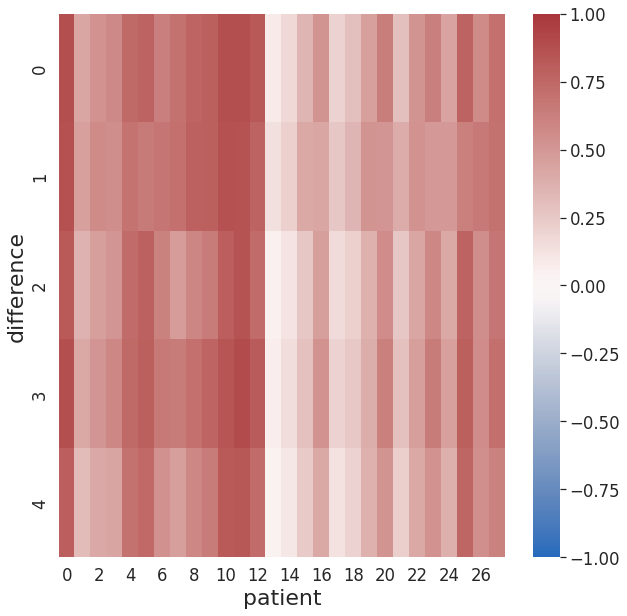

In [25]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

# sns.heatmap(heatmap_diff,
#             cmap='coolwarm',
#             annot=True,
#             fmt='.5g',
#             vmax=1)
# ax = sns.heatmap(test_heat,cmap = sns.color_palette("vlag", as_cmap=True),vmin=-1, vmax=1)
ax = sns.heatmap(heatmap_diff,cmap = 'cool')
plt.xlabel('patient',fontsize=22)
plt.ylabel('difference',fontsize=22)

Text(58.5, 0.5, 'difference')

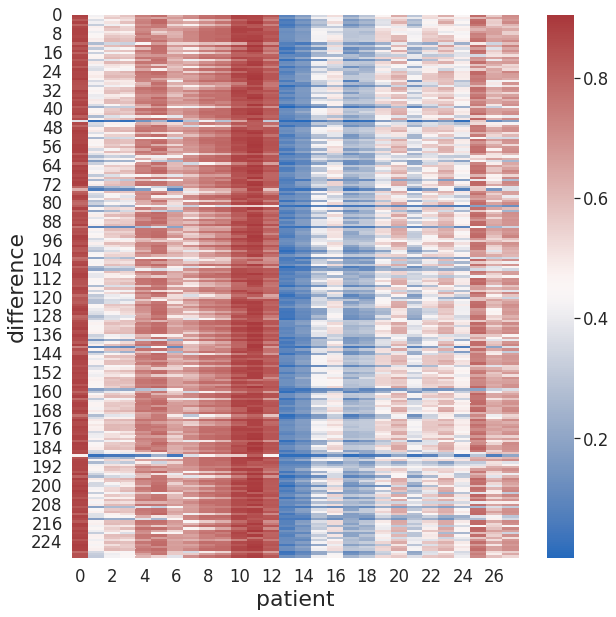

In [45]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

# sns.heatmap(heatmap_diff,
#             cmap='coolwarm',
#             annot=True,
#             fmt='.5g',
#             vmax=1)
# ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1)
ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True))
# ax = sns.heatmap(heatmap_diff,cmap = 'cool')
plt.xlabel('patient',fontsize=22)
plt.ylabel('difference',fontsize=22)

index -0-based:
0 column: redness -> peg & Glu
13 column : blueness -> BP & Skinthickness

In [27]:
row_num_single= heatmap_diff[heatmap_diff.iloc[:,1] < 0.2].index 
# .to_numpy() 
print(row_num_single)

Int64Index([45, 62, 73, 74, 81, 90, 138, 141, 159, 187, 209, 214], dtype='int64')


In [28]:
row_num_double= heatmap_diff[(heatmap_diff.iloc[:,1] < 0.3) & (heatmap_diff.iloc[:,16] < 0.35) &(heatmap_diff.iloc[:,24] < 0.15)].index 
# .to_numpy() 
print(row_num_double)

Int64Index([45, 74, 81, 90, 141, 187], dtype='int64')


In [29]:
tide = heatmap_diff[((heatmap_diff.iloc[:,5] < 0.4) & (heatmap_diff.iloc[:,25] < 0.3))|(heatmap_diff.iloc[:,0] < 0.4)].index 
print(tide)

Int64Index([45, 159, 187, 209, 214], dtype='int64')


In [30]:
sort = heatmap_diff[heatmap_diff.index.isin(row_num_double)]
print(sort)

           0         1         2         3         4         5         6   \
45   0.385488  0.020757  0.047353  0.024671  0.141360  0.237844  0.027801   
74   0.624776  0.060979  0.113955  0.101618  0.168762  0.422732  0.083718   
81   0.819475  0.199463  0.284486  0.240962  0.463470  0.413474  0.376081   
90   0.765251  0.090020  0.119157  0.110687  0.263799  0.364518  0.191757   
141  0.736885  0.083735  0.127494  0.101850  0.255469  0.450211  0.111126   
187  0.480337  0.028360  0.048488  0.054787  0.076014  0.233796  0.043219   

           7         8         9   ...        18        19        20  \
45   0.281750  0.414866  0.291187  ...  0.028491  0.179643  0.252878   
74   0.521767  0.630219  0.619778  ...  0.096869  0.198451  0.421686   
81   0.334869  0.438914  0.370292  ...  0.053254  0.152329  0.109048   
90   0.582453  0.639212  0.623995  ...  0.063033  0.180050  0.231973   
141  0.611022  0.695296  0.650671  ...  0.080075  0.230375  0.403725   
187  0.374837  0.467443  0.5

In [31]:
print(sort.describe().T)

    count      mean       std       min       25%       50%       75%  \
0     6.0  0.635368  0.171847  0.385488  0.516446  0.680830  0.758159   
1     6.0  0.080552  0.064687  0.020757  0.036514  0.072357  0.088449   
2     6.0  0.123489  0.086565  0.047353  0.064855  0.116556  0.125410   
3     6.0  0.105762  0.074176  0.024671  0.066494  0.101734  0.108478   
4     6.0  0.228146  0.135349  0.076014  0.148211  0.212116  0.261716   
5     6.0  0.353762  0.095467  0.233796  0.269513  0.388996  0.420418   
6     6.0  0.138950  0.129894  0.027801  0.053344  0.097422  0.171599   
7     6.0  0.451116  0.138440  0.281750  0.344861  0.448302  0.567282   
8     6.0  0.547658  0.120738  0.414866  0.446047  0.548831  0.636964   
9     6.0  0.517098  0.150515  0.291187  0.414385  0.583221  0.622941   
10    6.0  0.680827  0.107181  0.558308  0.582797  0.693518  0.773769   
11    6.0  0.804484  0.129182  0.548042  0.819307  0.843837  0.873652   
12    6.0  0.545405  0.149917  0.316830  0.477572  

In [32]:
print(heatmap_diff.iloc[74])

0     0.624776
1     0.060979
2     0.113955
3     0.101618
4     0.168762
5     0.422732
6     0.083718
7     0.521767
8     0.630219
9     0.619778
10    0.740787
11    0.877970
12    0.578366
13    0.044076
14    0.031214
15    0.114595
16    0.307360
17    0.043503
18    0.096869
19    0.198451
20    0.421686
21    0.094336
22    0.175016
23    0.431752
24    0.079291
25    0.568882
26    0.149957
27    0.372962
Name: 74, dtype: float32


In [33]:
print(heatmap_diff.iloc[45])

0     0.385488
1     0.020757
2     0.047353
3     0.024671
4     0.141360
5     0.237844
6     0.027801
7     0.281750
8     0.414866
9     0.291187
10    0.646248
11    0.826977
12    0.316830
13    0.017299
14    0.007480
15    0.088473
16    0.153371
17    0.013731
18    0.028491
19    0.179643
20    0.252878
21    0.036110
22    0.102061
23    0.165046
24    0.018525
25    0.568721
26    0.115063
27    0.185602
Name: 45, dtype: float32


In [34]:
print(heatmap_diff.iloc[187])

0     0.480337
1     0.028360
2     0.048488
3     0.054787
4     0.076014
5     0.233796
6     0.043219
7     0.374837
8     0.467443
9     0.546664
10    0.558308
11    0.816750
12    0.469365
13    0.017631
14    0.016490
15    0.047604
16    0.142953
17    0.020871
18    0.046850
19    0.077658
20    0.202782
21    0.041233
22    0.087642
23    0.274061
24    0.045840
25    0.297665
26    0.069005
27    0.202921
Name: 187, dtype: float32


In [35]:
filter = pd.DataFrame(x_test[heatmap_diff.index.isin(row_num_double)])
print(filter.describe().T)

   count      mean       std       min       25%       50%       75%       max
0    6.0  0.042639  0.036277  0.020363  0.026099  0.026625  0.037333  0.115393
1    6.0  0.051593  0.003238  0.046894  0.050275  0.051785  0.052433  0.056676
2    6.0  0.037925  0.004974  0.032507  0.034724  0.036940  0.039896  0.046298
3    6.0  0.053253  0.017638  0.026191  0.049738  0.051014  0.058985  0.080347
4    6.0  0.059696  0.069560  0.003351  0.019098  0.023191  0.090286  0.178059
5    6.0  0.046814  0.008971  0.039924  0.042426  0.044439  0.045391  0.064619
6    6.0  0.115356  0.038145  0.051142  0.098214  0.126133  0.142783  0.151484
7    6.0  0.033774  0.010597  0.025586  0.025586  0.028657  0.042473  0.048103


In [36]:
import statsmodels.stats.api as sms

inrerval = filter.apply(lambda x: sms.DescrStatsW(x).tconfint_mean(), axis=0)
print(inrerval)

          0         1         2         3         4         5         6  \
0  0.004569  0.048195  0.032705  0.034744 -0.013303  0.037399  0.075325   
1  0.080709  0.054991  0.043146  0.071763  0.132695  0.056229  0.155386   

          7  
0  0.022654  
1  0.044895  


In [37]:
import statsmodels.stats.api as sms
x_test_df = pd.DataFrame(x_test, columns = [data.columns[0:8]])
confid = x_test_df.apply(lambda x: sms.DescrStatsW(x).tconfint_mean())
confindence_interval= confid.to_numpy()
low_bd = confindence_interval[0]
high_bd = confindence_interval[1]


In [38]:
prediction_high = []
for j in range(8):
  X_high = np.copy(x_test)
  for i in range(len(x_test)):
    X_high[i][j] = high_bd[j]
  _, accuracy = model.evaluate(X_high, y_test, verbose=0)
  predictions_sub_high = model.predict(X_high) 
  if len(prediction_high) == 0:
    prediction_high = predictions_sub_high
  else:
    prediction_high = np.concatenate((prediction_high, predictions_sub_high), axis=1)
print(prediction_high)


8/8 [==============================] - 0s 2ms/step
[[0.17738192 0.38215518 0.19954698 ... 0.20860633 0.2891164  0.16097543]
 [0.45550632 0.42409742 0.45868948 ... 0.5318843  0.55146915 0.25745758]
 [0.11769925 0.1484963  0.0922654  ... 0.12542875 0.12641618 0.11530003]
 ...
 [0.09219167 0.0946146  0.0535164  ... 0.09712386 0.05575018 0.07639693]
 [0.08774856 0.19995838 0.07732563 ... 0.09769765 0.09741071 0.0952336 ]
 [0.71798235 0.42518437 0.59535915 ... 0.5065437  0.5540617  0.67668176]]


In [39]:
prediction_low = []
for j in range(8):
  X_low = np.copy(x_test)
  for i in range(len(x_test)):
    X_low[i][j] = low_bd[j]
  _, accuracy = model.evaluate(X_low, y_test, verbose=0)
  predictions_sub_low = model.predict(X_low) 
  if len(prediction_low) == 0:
    prediction_low = predictions_sub_low
  else:
    prediction_low = np.concatenate((prediction_low, predictions_sub_low), axis=1)
print(prediction_low)


8/8 [==============================] - 0s 2ms/step
[[0.16200568 0.33386332 0.19976507 ... 0.19467907 0.26852486 0.14968887]
 [0.4285819  0.3737113  0.4590284  ... 0.5102908  0.5260184  0.24135229]
 [0.10682472 0.12381414 0.09237976 ... 0.11623906 0.11552932 0.10680829]
 ...
 [0.0825952  0.07806727 0.05358556 ... 0.08979499 0.05059652 0.07054192]
 [0.07939225 0.16841435 0.07742305 ... 0.0903298  0.08876793 0.08807263]
 [0.69535637 0.3747531  0.59568805 ... 0.48491302 0.5286322  0.6575756 ]]


In [40]:
result_bd = np.subtract(prediction_high, prediction_low)
print(result_bd.shape)

(231, 8)


In [41]:
heatmap_bd_diff = pd.DataFrame(result_bd, columns = [data.columns[0:8]])
print(heatmap_bd_diff)

    Pregnancies   Glucose BloodPressure SkinThickness   Insulin       BMI  \
0      0.015376  0.048292     -0.000218      0.004040  0.004103  0.013927   
1      0.026924  0.050386     -0.000339      0.006511  0.006415  0.021594   
2      0.010875  0.024682     -0.000114      0.002297  0.002222  0.009190   
3      0.014824  0.039336     -0.000176      0.003091  0.003402  0.010915   
4      0.007601  0.023988     -0.000088      0.001848  0.001778  0.008759   
..          ...       ...           ...           ...       ...       ...   
226    0.026612  0.045352     -0.000318      0.006174  0.006057  0.019553   
227    0.022801  0.051742     -0.000308      0.005982  0.005860  0.017964   
228    0.009596  0.016547     -0.000069      0.001517  0.001341  0.007329   
229    0.008356  0.031544     -0.000097      0.001946  0.001955  0.007368   
230    0.022626  0.050431     -0.000329      0.006451  0.006443  0.021631   

    DiabetesPedigreeFunction       Age  
0                   0.020592  0.01

Text(58.5, 0.5, 'difference')

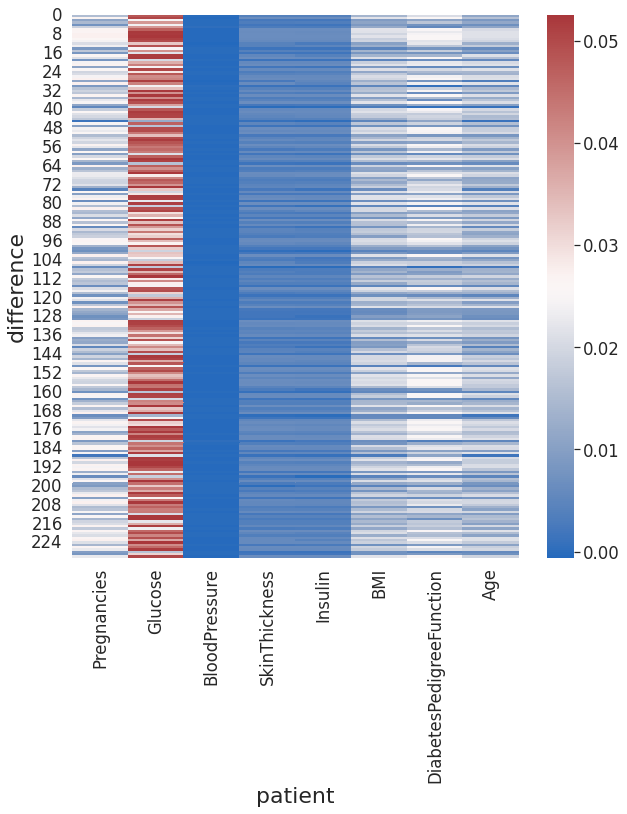

In [42]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

# sns.heatmap(heatmap_diff,
#             cmap='coolwarm',
#             annot=True,
#             fmt='.5g',
#             vmax=1)
# ax = sns.heatmap(heatmap_bd_diff,cmap = sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1)
ax = sns.heatmap(heatmap_bd_diff,cmap = sns.color_palette("vlag", as_cmap=True))

plt.xlabel('patient',fontsize=22)
plt.ylabel('difference',fontsize=22)